In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
seu_HQC <- readRDS(file = '../../data/seurat_object/Set3/seu_HQC_subclusterd2_Set3.obj')
seu_HQC

An object of class Seurat 
28745 features across 6118 samples within 2 assays 
Active assay: SCT (11239 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

In [4]:
seu.set2 <- readRDS(file = '../../data/seurat_object/Set2/seu_HQC_subclusterd2_Set2.obj')
seu.set2

An object of class Seurat 
28355 features across 4855 samples within 2 assays 
Active assay: SCT (10851 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

In [5]:
seu.bcd <- readRDS(file = '../../data/seurat_object/bcdRNAi/seu_HQC_subclustered2_bcdRNAi.obj')
seu.bcd

An object of class Seurat 
28533 features across 6168 samples within 2 assays 
Active assay: SCT (11029 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, tsne, reumap

In [6]:
seu_HQC$as <- 'others'
seu_HQC$as[seu_HQC$manual_ID %in% c('amnioserosa_PS1','amnioserosa_PS2','amnioserosa_PS3')] <- 'Amnioserosa_anterior'
seu_HQC$as[seu_HQC$manual_ID %in% c('amnioserosa_trunk')] <- 'Amnioserosa_trunk'

In [7]:
Idents(seu_HQC) <- 'as'
levels(seu_HQC) <- c('Amnioserosa_anterior','Amnioserosa_trunk','others')
colors <- c("plum3", "olivedrab3",'gray')

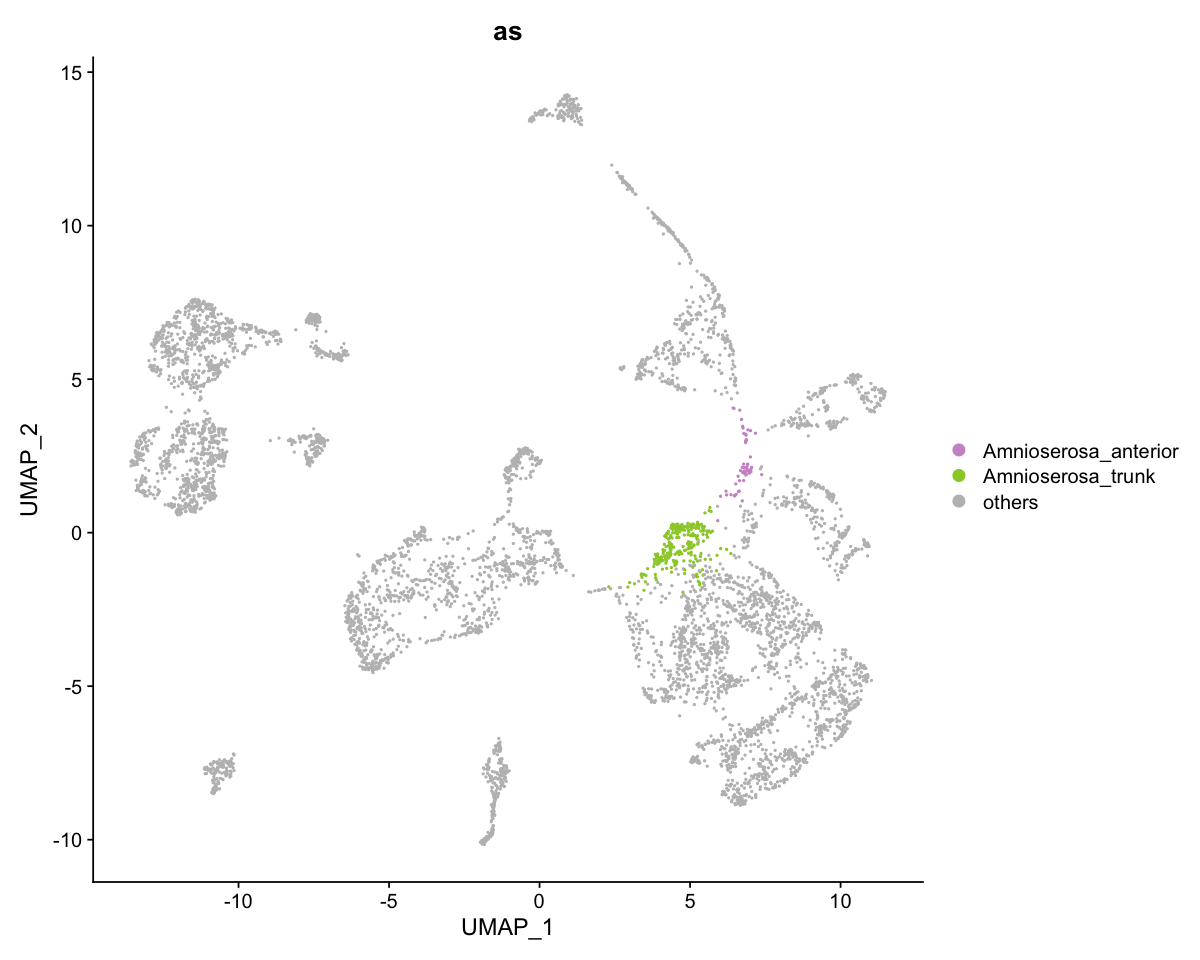

In [8]:
options(repr.plot.width=10, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", group.by = 'as',
               label = FALSE, cols = colors)
fig
ggsave(fig, file = './figures/4_Plot_amnioserosa/amnioserosa_Set3_with_legend.eps', width = 10, height = 8)

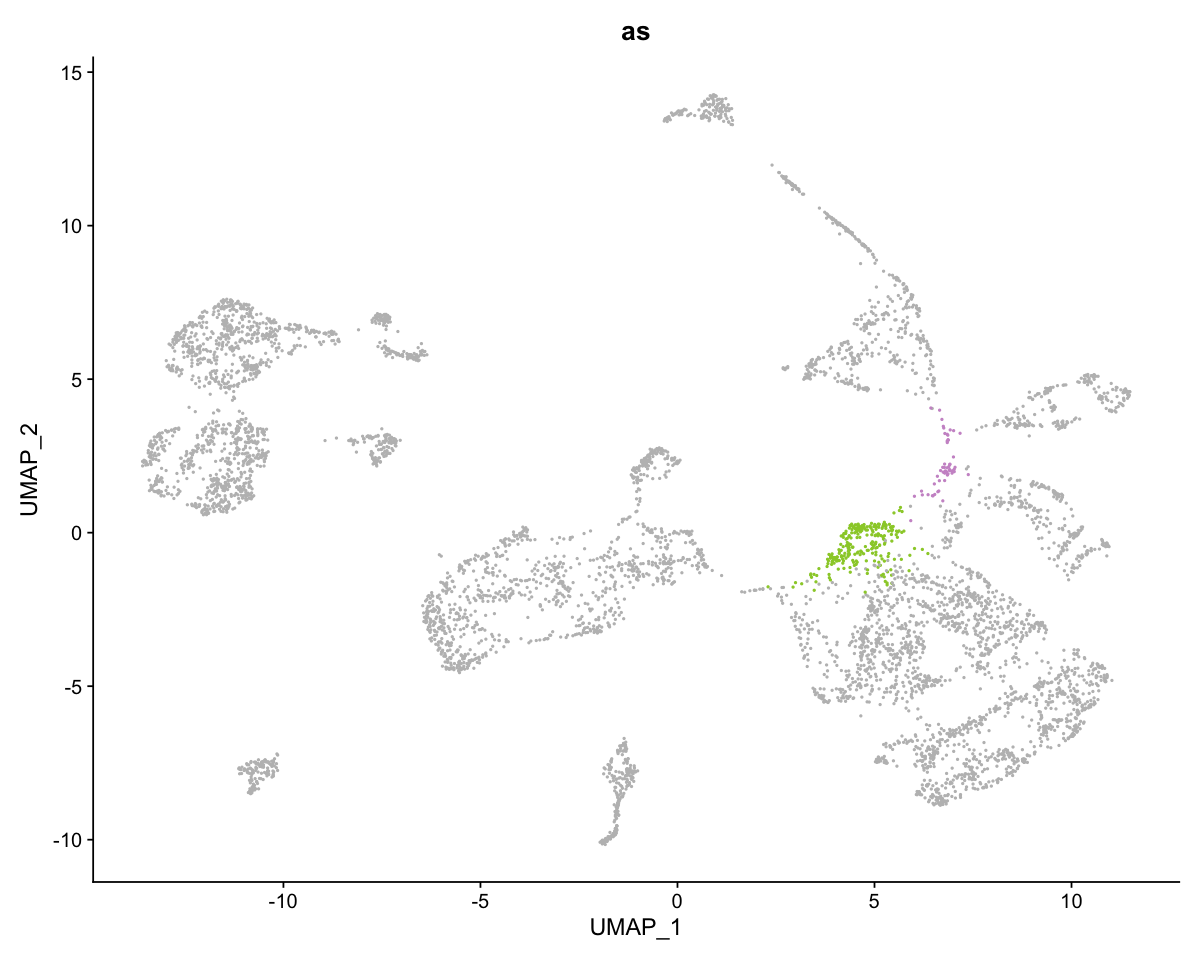

In [9]:
options(repr.plot.width=10, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", group.by = 'as',
               label = FALSE, cols = colors) + NoLegend()
fig
ggsave(fig, file = './figures/4_Plot_amnioserosa/amnioserosa_Set3.eps',width = 8, height = 8 )

In [10]:
seu.set2$as <- 'others'
seu.set2$as[seu.set2$manual_ID %in% c('amnioserosa_anterior')] <- 'Amnioserosa_anterior'
seu.set2$as[seu.set2$manual_ID %in% c('amnioserosa_trunk')] <- 'Amnioserosa_trunk'

In [11]:
Idents(seu.set2) <- 'as'
levels(seu.set2) <- c('Amnioserosa_anterior','Amnioserosa_trunk','others')
colors <- c("plum3", "olivedrab3","gray")

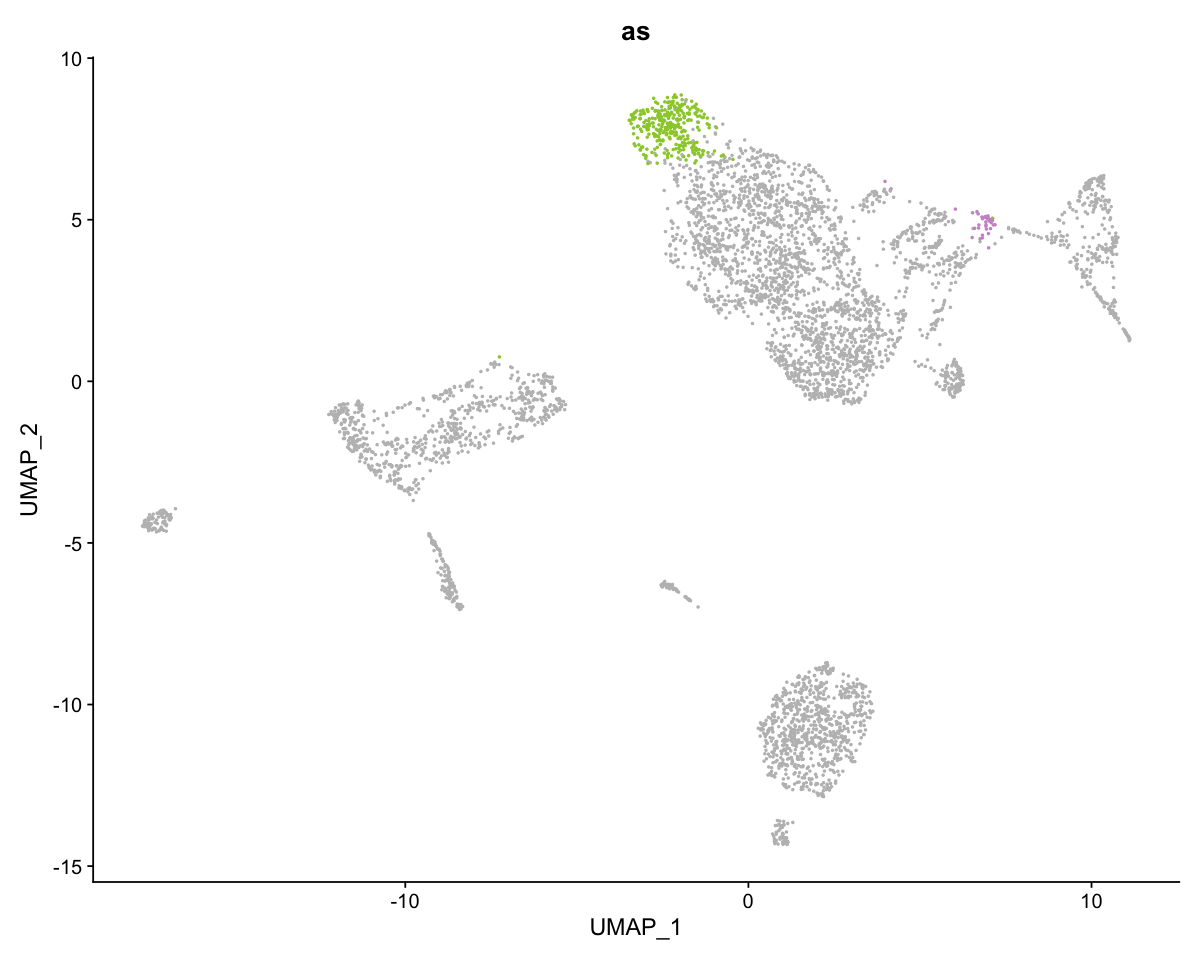

In [12]:
options(repr.plot.width=10, repr.plot.height=8)
fig <- DimPlot(seu.set2, reduction =  "umap", group.by = 'as',
               label = FALSE, cols = colors) + NoLegend()
fig
ggsave(fig, file = './figures/4_Plot_amnioserosa/amnioserosa_Set2.eps',width = 8, height = 8 )

In [13]:
seu.bcd$as <- 'others'
seu.bcd$as[seu.bcd$manual_ID %in% c('amnioserosa_trunk')] <- 'Amnioserosa_trunk'
Idents(seu.bcd) <- 'as'
levels(seu.bcd) <- c('Amnioserosa_trunk','others')
colors <- c('olivedrab3','gray')

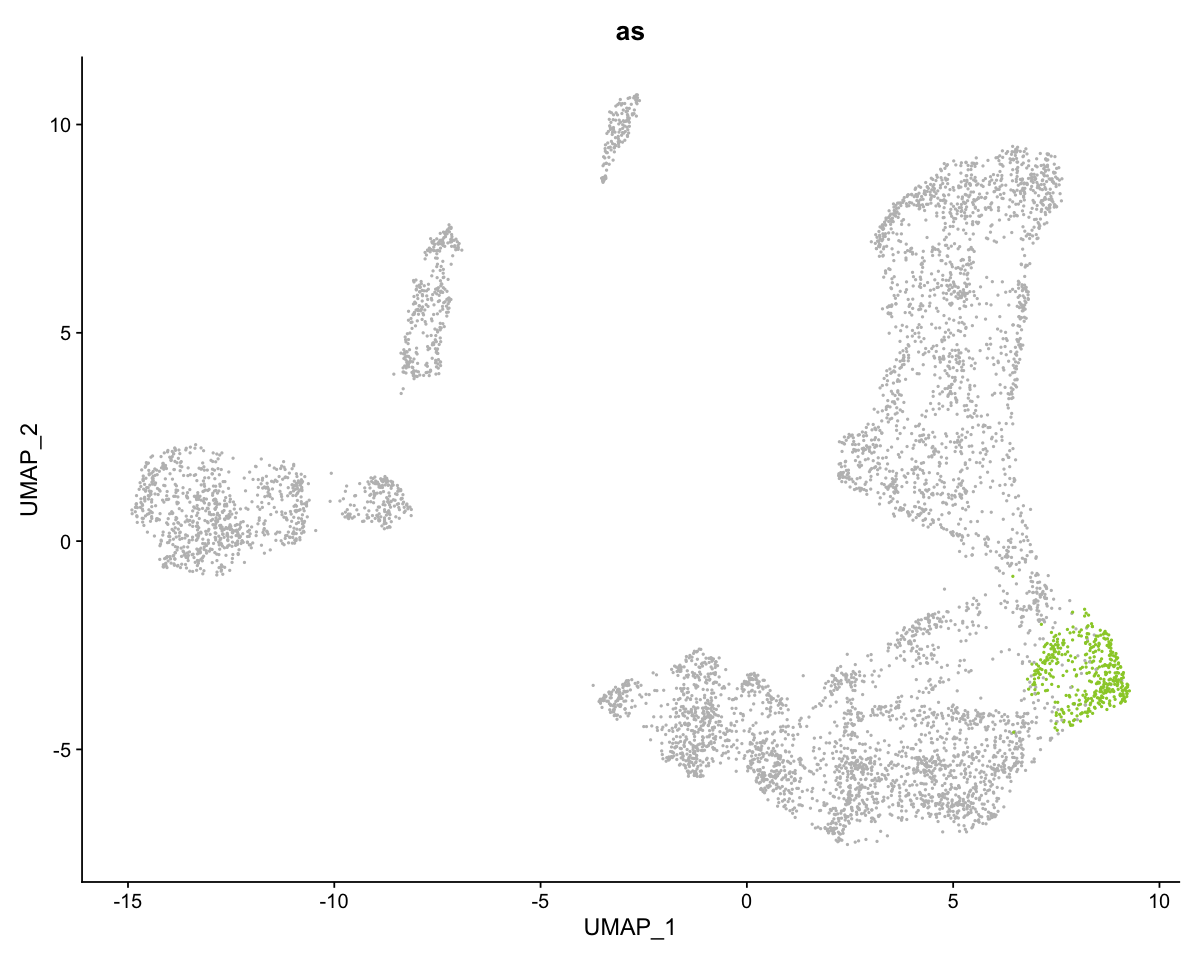

In [14]:
options(repr.plot.width=10, repr.plot.height=8)
fig <- DimPlot(seu.bcd, reduction =  "umap", group.by = 'as',
               cols = colors, label = FALSE) + NoLegend()
fig
ggsave(fig, file = './figures/4_Plot_amnioserosa/amnioserosa_bcdRNAi.eps',width = 8, height = 8 )

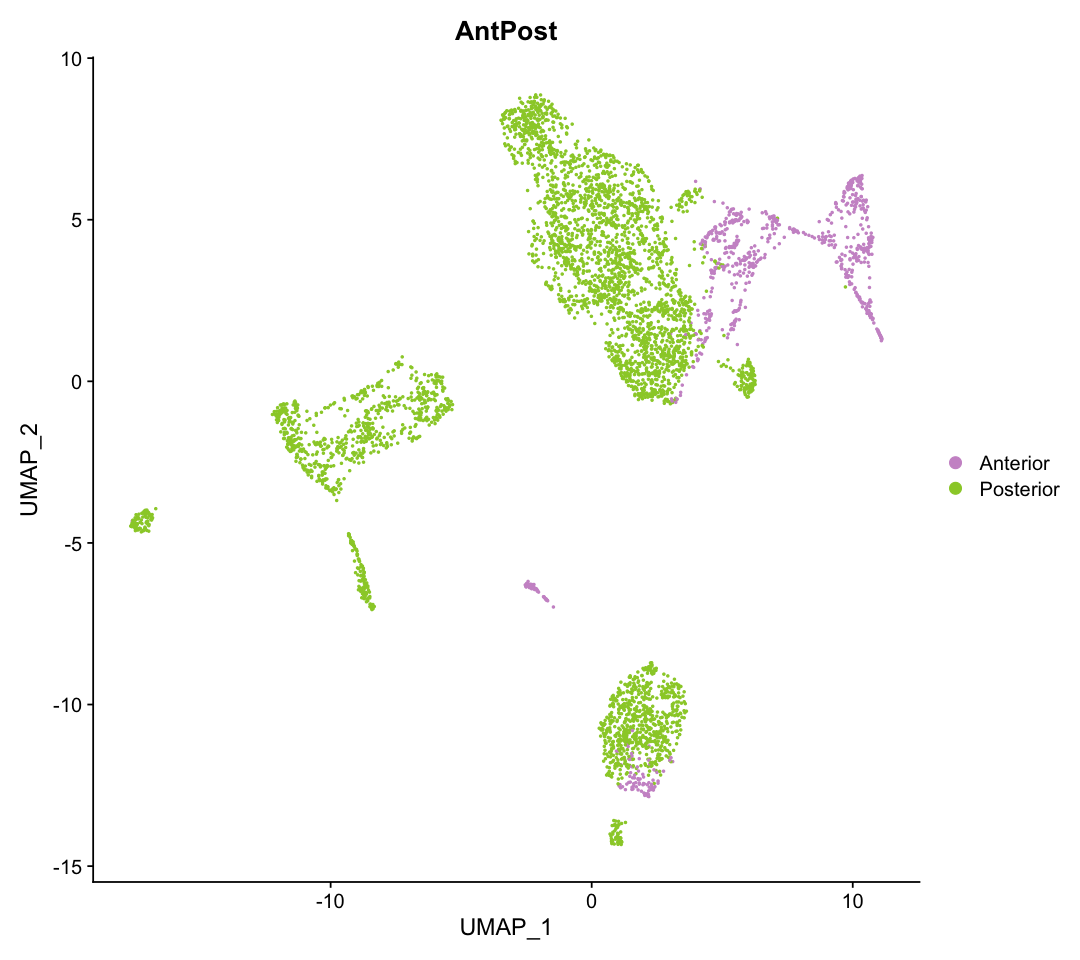

In [15]:
seu.set2$AntPost <- 'Posterior'
anterior.clusters <- c('mesoderm_head','endoderm_antMG',
                   'ectoderm_head_croc','ectoderm_head_Optix_Six4','ectoderm_head_Optix_sog',
                  'ectoderm_head_oc_CenG1A','ectoderm_head_oc_toy','ectoderm_head_oc_Oaz',
                   'ectoderm_head_Dfd_Oaz','ectoderm_head_kn','ectoderm_DE_PS0',
                   'ectoderm_lateral_NE_PS0','ectoderm_medial_NE_PS0','amnioserosa_anterior',
                  'ectoderm_medial_DE_PS1','ectoderm_intermediate_DE_PS1','ectoderm_lateral_DE_PS1',
                  'ectoderm_medial_NE_PS1','ectoderm_intermediate_NE_PS1','ectoderm_lateral_NE_PS1',
                  'ectoderm_medial_DE_PS2','ectoderm_intermediate_DE_PS2','ectoderm_lateral_DE_PS2',
                  'ectoderm_medial_NE_PS2','ectoderm_intermediate_NE_PS2','ectoderm_lateral_NE_PS2',
                  'mesoderm_gcm','mesoderm_gcm_Dfd','mesoderm_PS1_Dfd','mesoderm_PS2_ken','mesoderm_PS3')
seu.set2$AntPost[seu.set2$manual_ID %in% anterior.clusters] <- 'Anterior'
Idents(seu.set2) <- 'AntPost'
levels(seu.set2) <- c('Anterior','Posterior')
colors <- c("plum3", "olivedrab3")
options(repr.plot.width=9, repr.plot.height=8)
fig <- DimPlot(seu.set2, reduction =  "umap", group.by = 'AntPost',
               label = FALSE, cols = colors)
fig

In [16]:
length(anterior.clusters)

[1] 31